# Lab (Day 2)

## Goal
Continue the **CURP-like mini-project** and turn yesterday's logic into a small **data pipeline**:

1) Validate inputs with `if/else`  
2) Refactor into reusable **functions**  
3) Generate **fake data** using `faker`  
4) Read and write data as **CSV** (simulating an Excel export)  
5) Use `assert` to keep building **unit-test habits**  
6) (Optional) Use `lambda` for sorting/filtering

> Reminder: This is a training version (simplified), not an official RENAPO CURP generator.

---

## Required fields per record
Each person is a `dict` with:
- `first_name` (str)
- `paternal_last` (str)
- `maternal_last` (str)
- `dob` (str: `"YYYY-MM-DD"`)
- `sex` (str: `"H"` or `"M"`)
- `state` (str: **2-letter abbreviation**, e.g. `"DF"`, `"BC"`, `"BS"`, `"NE"`)

We will also load the official state abbreviations from the provided file:
`ENTIDAD_FEDERATIVA_201602(ENTIDAD_FEDERATIVA).csv`


## 0) Setup

Run the next cell. It includes:
- normalization helper (provided)
- constants
- today's sample dataset (small)


In [ ]:
import csv
import unicodedata
from pathlib import Path

VOWELS = set("AEIOU")
REQUIRED_FIELDS = {"first_name", "paternal_last", "maternal_last", "dob", "sex", "state"}

people = [
    {
        "first_name": "Concepción",
        "paternal_last": "Salgado",
        "maternal_last": "Briseño",
        "dob": "1956-06-26",
        "sex": "M",
        "state": "DF",
    },
    {
        "first_name": "Juan Carlos",
        "paternal_last": "Hernández",
        "maternal_last": "López",
        "dob": "1998-11-03",
        "sex": "H",
        "state": "BC",
    },
]

def normalize_text(s: str) -> str:
    """Uppercase, trim, remove diacritics, collapse spaces."""
    s = s.strip().upper()
    s = unicodedata.normalize("NFD", s)
    s = "".join(ch for ch in s if unicodedata.category(ch) != "Mn")
    s = " ".join(s.split())
    return s

assert normalize_text("  María José  ") == "MARIA JOSE"
assert normalize_text("Briseño") == "BRISENO"
print("Setup OK")


In [ ]:
! mkdir ../CorePython/data
!curl -L -o ../CorePython/data/ENTIDAD_FEDERATIVA_201602.csv "https://github.com/alientometal/PythonAcademy/blob/main/CorePython/data/ENTIDAD_FEDERATIVA_201602(ENTIDAD_FEDERATIVA).csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  183k    0  183k    0     0   286k      0 --:--:-- --:--:-- --:--:--  286k


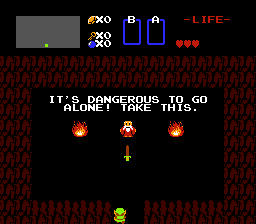

Look in CorePython directory ¬¬

In [1]:
!python -m venv .venv

In [3]:
!pip freeze | grep Faker

Faker==40.1.2


In [2]:
! which python

/workspaces/PythonAcademy/.venv/bin/python


In [5]:
! python -m pip freeze > ../requirements.txt

In [7]:
! python -m pip install -r ../requirements.txt

## 1) Load State Abbreviations (CSV Catalog)

We will load the file:

`ENTIDAD_FEDERATIVA_201602(ENTIDAD_FEDERATIVA).csv`

Columns:
- `CATALOG_KEY`
- `ENTIDAD_FEDERATIVA`
- `ABREVIATURA`

### Task
1) Read the CSV using the `csv` module (not pandas today).
2) Build a dictionary `state_name_to_code`:
   - key: normalized entity name (e.g., `"BAJA CALIFORNIA SUR"`)
   - value: abbreviation (e.g., `"BS"`)

3) Create a second dictionary `state_code_to_name` for reverse lookup.

### Checks
- `"BAJA CALIFORNIA SUR"` should map to `"BS"`
- `"NO ESPECIFICADO"` should map to `"NE"`


In [ ]:
catalog_path = Path("ENTIDAD_FEDERATIVA_201602(ENTIDAD_FEDERATIVA).csv")

# TODO:
# - open the file with encoding='latin-1'
# - use csv.DictReader
# - build:
#   state_name_to_code = {...}
#   state_code_to_name = {...}

state_name_to_code = {}
state_code_to_name = {}

# --- YOUR CODE HERE ---


# --- Tests ---
assert state_name_to_code[normalize_text("Baja California Sur")] == "BS"
assert state_name_to_code[normalize_text("No Especificado")] == "NE"
assert state_code_to_name["BC"] == "BAJA CALIFORNIA"

print("Exercise 1 OK. States loaded:", len(state_name_to_code))


## 2) Input Validation with `if` + Exceptions

Before building an identifier, we want to validate:

- Required fields exist
- `sex` must be `"H"` or `"M"`
- `dob` must match `"YYYY-MM-DD"` shape (length 10, dashes at 4 and 7, digits elsewhere)
- `state` must be a known 2-letter code (exists in `state_code_to_name`)

### Task
Implement `validate_person(person, state_code_to_name)`:
- If invalid, raise `ValueError` with a clear message.
- If valid, return `True`.

### Checks
Test with:
1) a valid person (should return True)
2) an invalid person with sex `"X"` (should raise)


In [ ]:
def validate_person(person: dict, state_code_to_name: dict) -> bool:
    # TODO:
    # - check required fields
    # - validate sex
    # - validate dob format (simple structural checks)
    # - validate state code in mapping
    # - raise ValueError with message if any check fails
    return True

# Valid
assert validate_person(people[0], state_code_to_name) is True

# Invalid sex should raise
bad = dict(people[0])
bad["sex"] = "X"

try:
    validate_person(bad, state_code_to_name)
    assert False, "Expected ValueError for invalid sex"
except ValueError as e:
    print("Caught expected error:", e)

print("Exercise 2 OK")


## 3) Refactor: Extraction Functions (Reuse Lab 1 Logic)

### Task
Implement these functions:

- `first_internal_vowel(s)`
- `first_internal_consonant(s)`
- `extract_yymmdd(dob)`

Rules are the same as last time.
Use `assert` tests as guidance.


In [ ]:
def first_internal_vowel(s: str) -> str:
    # TODO
    pass

def first_internal_consonant(s: str) -> str:
    # TODO
    pass

def extract_yymmdd(dob: str) -> str:
    # TODO
    pass

# Tests
assert first_internal_vowel("SALGADO") == "A"
assert first_internal_vowel("BCDFG") == "X"

assert first_internal_consonant("SALGADO") == "L"
assert first_internal_consonant("AEIOU") == "X"

assert extract_yymmdd("1956-06-26") == "560626"
assert extract_yymmdd("2004-01-09") == "040109"

print("Exercise 3 OK")


## 4) Build a Clean `build_curp_like(person)` Function

### Task
Implement `build_curp_like(person, state_code_to_name)`:

1) Validate with `validate_person(...)`
2) Normalize the name fields
3) Build:
- block1 (4 chars)
- date block (6 chars)
- block2 (sex + state[:2]) (3 chars)
- block3 (3 chars)
- suffix `"00"`

Return the final 18-character key.

### Check
For the first example record:
`SABC560626MDFLRN00`


In [ ]:
def build_curp_like(person: dict, state_code_to_name: dict) -> str:
    # TODO:
    # - validate first
    # - normalize
    # - build blocks
    # - return key
    pass

key0 = build_curp_like(people[0], state_code_to_name)
print("people[0] key:", key0)

assert key0 == "SABC560626MDFLRN00"
assert len(key0) == 18

print("Exercise 4 OK")


## 5) Generate Fake Data with `faker`

We will use `faker` to generate realistic names.

### Install (if needed)
If `faker` is not installed in your environment, run:

```python
!pip -q install faker
```

### Task
1) Create a `Faker` instance with Spanish locale: `"es_MX"`
2) Generate **N** fake people dictionaries with required fields:
   - `first_name`: use faker to generate a first name (you can take the first token if you get a full name)
   - `paternal_last`, `maternal_last`: use faker last name
   - `dob`: random date between 1950 and 2010 formatted as `"YYYY-MM-DD"`
   - `sex`: random choice `"H"` or `"M"`
   - `state`: choose a random state code from `state_code_to_name` keys

3) Validate and build keys for all generated records.

### Check
- `len(fake_people) == N`
- all keys have length 18


In [ ]:
# If you need to install faker, uncomment:
#       If you want to learn how to set up an environment for your project dependencies, ask me.
# !pip -q install faker

from random import choice
from faker import Faker

# TODO:
# - faker = Faker("es_MX")
# - generate N fake people dicts into fake_people list

N = 20
faker = Faker("es_MX")

fake_people = []

# --- YOUR CODE HERE ---
# ptss Hint: faker can be used to suggest female or male names so you can skip random choosing
# Hint 2: Also Date of Birth...
# Hint 3: Faker is not good to suggest Mexican States, choose random for this ;)


# Build keys
fake_keys = []
for p in fake_people:
    k = build_curp_like(p, state_code_to_name)
    fake_keys.append(k)

print("Generated", len(fake_people), "fake records")
print("Sample keys:", fake_keys[:5])

assert len(fake_people) == N
assert all(len(k) == 18 for k in fake_keys)

print("Exercise 5 OK")


## 6) Write the Fake Dataset to CSV (Simulating Excel Export)

In real life you might receive an Excel file. A common workflow is:
Excel → "Save as CSV" → pipeline reads the CSV.

### Task
Write `fake_people` to a CSV file named `people_input.csv` with a header row.

Required columns (exact names):
`first_name,paternal_last,maternal_last,dob,sex,state`

### Check
- The file exists
- The first row read back has all required keys


In [ ]:
output_csv = Path("people_input.csv")

# TODO:
# - open output_csv for writing
# - write header with REQUIRED_FIELDS in a stable order
# - write each row from fake_people

# --- YOUR CODE HERE ---


assert output_csv.exists(), "CSV file was not created"

# Read back first row for a sanity check
# Really utf-8? are you sure? 
with output_csv.open("r", encoding="utf-8", newline="") as f:
    reader = csv.DictReader(f)
    first_row = next(reader)

print("First row from CSV:", first_row)
assert REQUIRED_FIELDS.issubset(first_row.keys())

print("Exercise 6 OK")


## 7) Read CSV and Run the Pipeline (with Exception Handling)

### Task
Implement `read_people_csv(path)`:
- Read the CSV file into a list of dicts.
- Ensure every dict has the required fields.

Then implement `build_keys_pipeline(records)`:
- For each record:
  - Try to validate + build key
  - If it fails: collect the error into an `errors` list (do not crash the whole pipeline)
- Return `(keys, errors)`

### Checks
- keys list length + errors length should equal number of records
- print at least 3 errors if you intentionally corrupt a few records


In [ ]:
def read_people_csv(path: Path) -> list[dict]:
    # TODO:
    # - read CSV with DictReader
    # - ensure required fields exist
    # - return list of records
    pass

def build_keys_pipeline(records: list[dict]) -> tuple[list[str], list[str]]:
    # TODO:
    # - for each record, try build_curp_like
    # - if success -> append key
    # - if exception -> append readable error string
    # - return (keys, errors)
    pass

records = read_people_csv(output_csv)

# Intentionally corrupt 2 records to test exception handling
records[0]["sex"] = "X"
records[1]["dob"] = "19AA-99-99"

keys, errors = build_keys_pipeline(records)

print("Keys generated:", len(keys))
print("Errors captured:", len(errors))
print("Sample errors:", errors[:3])

assert len(keys) + len(errors) == len(records)

print("Exercise 7 OK")


## 8) (Optional) `lambda` Practice — Sorting and Filtering

### Task A
Sort the **valid** keys (from `keys`) alphabetically.

### Task B
Filter records born in year >= 2000 using a `lambda`.

Hints:
- Year is `dob[:4]`
- Convert to int: `int(year_str)`


In [ ]:
# Task A: sort keys
sorted_keys = sorted(keys, key=lambda k: k)  # lambda is redundant here but shown for practice
print("First 5 sorted keys:", sorted_keys[:5])

# Task B: filter records born >= 2000 (use the non-corrupted original CSV read again)
records_clean = read_people_csv(output_csv)

born_2000_plus = list(filter(lambda r: int(r["dob"][:4]) >= 2000, records_clean))
print("Born >= 2000:", len(born_2000_plus))

assert all(int(r["dob"][:4]) >= 2000 for r in born_2000_plus)

print("Exercise 8 OK")


## Wrap-up / What’s next

You now have the core of a pipeline:
- load catalogs (state codes)
- validate records
- generate IDs
- read/write CSV
- handle errors without crashing

Next lab we can:
- read from a real CSV exported from Excel (your file)
- write `people_output.csv` with an extra `curp_like` column
- add logging + better error reporting
- optionally implement a more realistic suffix strategy
